# IMDB Predictive Analytics

This notebook explores using data science techniques on a data set of 5000+ movies, and predicting whether a movie will be highly rated on IMDb.

The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

This notebook is adapted from ["Titanic Data Science Solutions" by Manav Sehgal](https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions)


## Workflow stages

This workflow goes through seven stages.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.


## Question and problem definition

The original data set used in this notebook [can be found here at Kaggle](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

> Knowing from a training set of samples listing movies and their IMDb scores, can our model determine based on a given test dataset not containing the scores, if the movies in the test dataset scored highly or not?


## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on [Which chart or graph is right for you?](http://www.tableau.com/learn/whitepapers/which-chart-or-graph-is-right-for-you#ERAcoH5sEG5CFlek.99).

In [851]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import truncnorm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames. We will partition off 80% as our training data and 20% of the data as our test data. We also combine these datasets to run certain operations on both datasets together.

In [852]:
df = pd.read_csv('../input/movie_metadata.csv')
train_df, test_df = train_test_split(df, test_size = 0.2)
# test_actual = test_df['imdb_score']
# test_df = test_df.drop('imdb_score', axis=1)
combine = [train_df, test_df]

## Analyze by describing data

Pandas also helps describe the datasets answering following questions early in our project.

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Kaggle page here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

In [853]:
print(train_df.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


**Which features are categorical?**

- Color, Director name, Actor 1 name, Actor 2 name, Actor 3 name, Genres, Language, Country, Content Rating, Movie title, Plot keywords, Movie IMDb link

**Which features are numerical?**

- Number of critics for reviews, Duration, Director Facebook likes, Actor 1 Facebook likes, Actor 2 Facebook likes, Actor 3 Facebook likes, Gross, Number of voted users, Cast total Facebook likes, Number of faces in poster, Number of users for reviews, Budget, Title year, IMDb score, Aspect ratio, Movie Facebook likes

In [854]:
pd.set_option('display.max_columns', 50)

In [855]:
# preview the data
train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3996,Color,Robert Eggers,425.0,92.0,22.0,159.0,Kate Dickie,648.0,25138292.0,Horror|Mystery,Julian Richings,The Witch,66483,1122,Ralph Ineson,0.0,black magic|goat|isolation|naked woman|witch,http://www.imdb.com/title/tt4263482/?ref_=fn_t...,452.0,English,USA,R,3500000.0,2015.0,191.0,6.8,1.66,43000
882,Color,Karyn Kusama,178.0,93.0,45.0,352.0,Sophie Okonedo,9000.0,25857987.0,Action|Sci-Fi,Charlize Theron,Æon Flux,110614,10185,Paterson Joseph,0.0,based on cult favorite|disease|female hero|fem...,http://www.imdb.com/title/tt0402022/?ref_=fn_t...,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,5.5,2.35,0
4639,Color,Kat Coiro,18.0,100.0,28.0,501.0,Geoff Stults,945.0,20186.0,Comedy,Justin Kirk,L!fe Happens,6025,2924,Kristen Johnston,8.0,friendship|los angeles california|one night st...,http://www.imdb.com/title/tt1726589/?ref_=fn_t...,15.0,English,USA,R,930000.0,2011.0,756.0,5.7,2.35,995
2173,Color,Julie Anne Robinson,123.0,107.0,30.0,318.0,Bobby Coleman,742.0,62933793.0,Drama|Family|Music|Romance,Kelly Preston,The Last Song,62421,2341,Melissa Ordway,1.0,beach|fire|love|pianist|summer,http://www.imdb.com/title/tt1294226/?ref_=fn_t...,185.0,English,USA,PG,20000000.0,2010.0,360.0,5.8,2.35,10000
2534,Color,Oliver Stone,114.0,126.0,0.0,168.0,Tamara Tunie,826.0,43848100.0,Crime|Drama,Hal Holbrook,Wall Street,119150,1607,James Karen,2.0,1980s|argument|critique of capitalism|f word|f...,http://www.imdb.com/title/tt0094291/?ref_=fn_t...,219.0,English,USA,R,15000000.0,1987.0,508.0,7.4,1.85,0


In [856]:
incomplete = train_df.columns[pd.isnull(df).any()].tolist()
train_df[incomplete].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 3996 to 1599
Data columns (total 21 columns):
color                      4019 non-null object
director_name              3952 non-null object
num_critic_for_reviews     3989 non-null float64
duration                   4024 non-null float64
director_facebook_likes    3952 non-null float64
actor_3_facebook_likes     4014 non-null float64
actor_2_name               4023 non-null object
actor_1_facebook_likes     4028 non-null float64
gross                      3319 non-null float64
actor_1_name               4028 non-null object
actor_3_name               4014 non-null object
facenumber_in_poster       4023 non-null float64
plot_keywords              3912 non-null object
num_user_for_reviews       4017 non-null float64
language                   4024 non-null object
country                    4030 non-null object
content_rating             3790 non-null object
budget                     3626 non-null float64
title_year       

**Which features contain blank, null or empty values?**

These will require correcting.

 - color
 - director_name
 - num_critic_for_reviews
 - duration
 - director_facebook_likes
 - actor_3_facebook_likes
 - actor_2_name
 - actor_1_facebook_likes
 - gross
 - actor_1_name
 - actor_3_name
 - facenumber_in_poster
 - plot_keywords
 - num_user_for_reviews
 - language
 - country
 - content_rating
 - budget
 - title_year
 - actor_2_facebook_likes
 - aspect_ratio

**What are the data types for various features?**

Helping us during converting goal.

- Twelve features are floats.
- Nine features are strings (object).

In [857]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 3996 to 1599
Data columns (total 28 columns):
color                        4019 non-null object
director_name                3952 non-null object
num_critic_for_reviews       3989 non-null float64
duration                     4024 non-null float64
director_facebook_likes      3952 non-null float64
actor_3_facebook_likes       4014 non-null float64
actor_2_name                 4023 non-null object
actor_1_facebook_likes       4028 non-null float64
gross                        3319 non-null float64
genres                       4034 non-null object
actor_1_name                 4028 non-null object
movie_title                  4034 non-null object
num_voted_users              4034 non-null int64
cast_total_facebook_likes    4034 non-null int64
actor_3_name                 4014 non-null object
facenumber_in_poster         4023 non-null float64
plot_keywords                3912 non-null object
movie_imdb_link              4034 n

In [858]:
train_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3989.000000,4024.000000,3952.000000,4014.000000,4028.000000,3.319000e+03,4.034000e+03,4034.000000,4023.000000,4017.000000,3.626000e+03,3948.000000,4023.000000,4034.000000,3771.000000,4034.000000
mean,138.035849,107.084990,704.098178,640.265321,6528.204568,4.771169e+07,8.145238e+04,9638.596182,1.375342,267.978342,4.106054e+07,2002.396657,1638.721104,6.430218,2.209812,7305.915469
std,120.395528,25.753043,2859.355623,1641.607223,15998.609842,6.796650e+07,1.363814e+05,19020.193619,2.025891,371.202901,2.298020e+08,12.387675,4128.190477,1.138611,1.348138,19297.368247
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.330000,0.000000
25%,50.000000,93.000000,7.000000,134.000000,612.750000,5.104878e+06,8.183000e+03,1404.000000,0.000000,63.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,107.000000,103.000000,50.000000,368.000000,983.000000,2.512129e+07,3.241350e+04,3062.000000,1.000000,153.000000,1.900000e+07,2005.000000,593.000000,6.600000,2.350000,161.000000
75%,192.000000,118.000000,197.000000,629.000000,11000.000000,6.119694e+07,9.268650e+04,13575.250000,2.000000,320.000000,4.300000e+07,2011.000000,909.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,4667.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


**What is the distribution of categorical features?**

In [859]:
train_df.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4019,3952,4023,4034,4028,4034,4014,3912,4034,4024,4030,3790
unique,2,2089,2596,805,1813,3951,2965,3827,3951,38,62,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Home,Sam Shepard,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,3844,22,17,185,37,3,7,3,3,3758,3044,1675


### Transformation of IMDb score

Let's simplify this problem into a binary classification/regression. Let us treat all movies with an IMDb score of 7.0 or higher as "good" (with a value of '1') and all below as "bad" (with a value of '0').

In [860]:
for dataset in combine:
    dataset.loc[ dataset['imdb_score'] < 7.0, 'imdb_score'] = 0
    dataset.loc[ dataset['imdb_score'] >= 7.0, 'imdb_score'] = 1

train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3996,Color,Robert Eggers,425.0,92.0,22.0,159.0,Kate Dickie,648.0,25138292.0,Horror|Mystery,Julian Richings,The Witch,66483,1122,Ralph Ineson,0.0,black magic|goat|isolation|naked woman|witch,http://www.imdb.com/title/tt4263482/?ref_=fn_t...,452.0,English,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000
882,Color,Karyn Kusama,178.0,93.0,45.0,352.0,Sophie Okonedo,9000.0,25857987.0,Action|Sci-Fi,Charlize Theron,Æon Flux,110614,10185,Paterson Joseph,0.0,based on cult favorite|disease|female hero|fem...,http://www.imdb.com/title/tt0402022/?ref_=fn_t...,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0
4639,Color,Kat Coiro,18.0,100.0,28.0,501.0,Geoff Stults,945.0,20186.0,Comedy,Justin Kirk,L!fe Happens,6025,2924,Kristen Johnston,8.0,friendship|los angeles california|one night st...,http://www.imdb.com/title/tt1726589/?ref_=fn_t...,15.0,English,USA,R,930000.0,2011.0,756.0,0.0,2.35,995
2173,Color,Julie Anne Robinson,123.0,107.0,30.0,318.0,Bobby Coleman,742.0,62933793.0,Drama|Family|Music|Romance,Kelly Preston,The Last Song,62421,2341,Melissa Ordway,1.0,beach|fire|love|pianist|summer,http://www.imdb.com/title/tt1294226/?ref_=fn_t...,185.0,English,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000
2534,Color,Oliver Stone,114.0,126.0,0.0,168.0,Tamara Tunie,826.0,43848100.0,Crime|Drama,Hal Holbrook,Wall Street,119150,1607,James Karen,2.0,1980s|argument|critique of capitalism|f word|f...,http://www.imdb.com/title/tt0094291/?ref_=fn_t...,219.0,English,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with IMDb score. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

**Correcting.**

**Creating.**

**Classifying.**


## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [861]:
train_df[['content_rating', 'imdb_score']].groupby(['content_rating'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,content_rating,imdb_score
15,TV-Y7,1.000000
14,TV-Y,1.000000
12,TV-MA,1.000000
8,Passed,0.833333
10,TV-14,0.772727
0,Approved,0.744186
13,TV-PG,0.727273
16,Unrated,0.625000
17,X,0.500000
1,G,0.478723


In [862]:
train_df[["color", "imdb_score"]].groupby(['color'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,color,imdb_score
0,Black and White,0.651429
1,Color,0.336629


In [863]:
train_df[["director_name", "imdb_score"]].groupby(['director_name'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,director_name,imdb_score
1044,Jorge R. Gutiérrez,1.0
409,Dany Boon,1.0
1562,Peter Ho-Sun Chan,1.0
1827,Simon Napier-Bell,1.0
841,Jason Miller,1.0
842,Jason Moore,1.0
1558,Peter H. Hunt,1.0
1557,Peter Farrelly,1.0
1834,Spike Jonze,1.0
1836,Stacy Peralta,1.0


In [864]:
train_df[["country", "imdb_score"]].groupby(['country'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,country,imdb_score
31,Kenya,1.000000
16,Finland,1.000000
60,United Arab Emirates,1.000000
51,Soviet Union,1.000000
42,Panama,1.000000
8,Cameroon,1.000000
41,Pakistan,1.000000
25,Indonesia,1.000000
28,Israel,1.000000
12,Colombia,1.000000


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (IMDb score).

**Observations.**

**Decisions.**

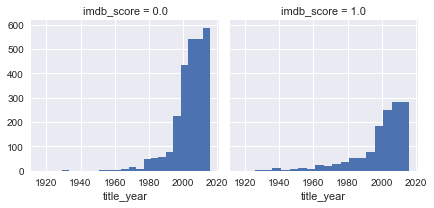

In [865]:
g = sns.FacetGrid(train_df, col='imdb_score')
g.map(plt.hist, 'title_year', bins=20)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

**Decisions.**


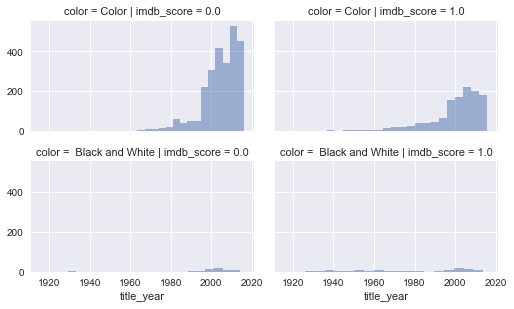

In [866]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='imdb_score', row='color', size=2.2, aspect=1.6)
grid.map(plt.hist, 'title_year', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

**Decisions.**


In [867]:
# grid = sns.FacetGrid(train_df, col='Embarked')
# grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()

### Correlating categorical and numerical features

**Observations.**

**Decisions.**


In [868]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
# grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
# grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
# grid.add_legend()

## Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the actor_2_name, genres, actor_1_name, movie_title, actor_3_name, plot_keywords, movie_imdb_link features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [869]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['genres', 'movie_title', 'plot_keywords', 'movie_imdb_link'], axis=1)
test_df = test_df.drop(['genres', 'movie_title', 'plot_keywords', 'movie_imdb_link'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (4034, 28), (1009, 28), (4034, 28), (1009, 28))


('After', (4034, 24), (1009, 24), (4034, 24), (1009, 24))

### Creating new feature extracting from existing

We want to analyze if the Director and Actor name features can be engineered to extract number of films starred or directed and test correlation between number of films and score, before dropping Director and Actor name features.

In the following code we extract the `num_of_films_director` and `num_of_films_actor` features by iterating over the dataframe.

If the director name field is empty, we fill the field with 1.

**Observations.**

When we plot the number of films directed, and number of films acted in, we note the following observations.

- Directors with more films under their belt tend to have a higher success rate. It seems practice *does* make perfect.
- Films where the actors have a higher number of combined films have a higher success rate. A more experienced cast, a better movie.

**Decision.**

- We decide to band the directors into groups by number of films directed.
- We decide to band the "total combined films acted in" into groups.

In [870]:
actors = {}
directors = {}
for dataset in combine:
    for index, row in dataset.iterrows():
        for actor in row[['actor_1_name', 'actor_2_name', 'actor_3_name']]:
            if actor is not np.nan:
                if actor not in actors:
                    actors[actor] = 0
                actors[actor] += 1
        director = row['director_name']
        if director is not np.nan:
            if director not in directors:
                directors[director] = 0
            directors[director] += 1    

In [871]:
for dataset in combine:
    dataset['num_of_films_director'] = dataset["director_name"].dropna().map(directors).astype(int)
    dataset['num_of_films_director'] = dataset['num_of_films_director'].fillna(1)

In [872]:
train_df['NumFilmsBand'] = pd.cut(train_df['num_of_films_director'], 4)
train_df[['NumFilmsBand', 'imdb_score']].groupby(['NumFilmsBand'], as_index=False).mean().sort_values(by='NumFilmsBand', ascending=True)

,NumFilmsBand,imdb_score
0,"(0.975, 7.25]",0.331071
1,"(7.25, 13.5]",0.413655
2,"(13.5, 19.75]",0.440000
3,"(19.75, 26]",0.694444


In [873]:
for dataset in combine:    
    dataset.loc[ dataset['num_of_films_director'] <= 7, 'num_of_films_director'] = 0
    dataset.loc[(dataset['num_of_films_director'] > 7) & (dataset['num_of_films_director'] <= 13), 'num_of_films_director'] = 1
    dataset.loc[(dataset['num_of_films_director'] > 13) & (dataset['num_of_films_director'] <= 19), 'num_of_films_director'] = 2
    dataset.loc[ dataset['num_of_films_director'] > 19, 'num_of_films_director'] = 3
train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,NumFilmsBand
3996,Color,Robert Eggers,425.0,92.0,22.0,159.0,Kate Dickie,648.0,25138292.0,Julian Richings,66483,1122,Ralph Ineson,0.0,452.0,English,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,"(0.975, 7.25]"
882,Color,Karyn Kusama,178.0,93.0,45.0,352.0,Sophie Okonedo,9000.0,25857987.0,Charlize Theron,110614,10185,Paterson Joseph,0.0,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,"(0.975, 7.25]"
4639,Color,Kat Coiro,18.0,100.0,28.0,501.0,Geoff Stults,945.0,20186.0,Justin Kirk,6025,2924,Kristen Johnston,8.0,15.0,English,USA,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,"(0.975, 7.25]"
2173,Color,Julie Anne Robinson,123.0,107.0,30.0,318.0,Bobby Coleman,742.0,62933793.0,Kelly Preston,62421,2341,Melissa Ordway,1.0,185.0,English,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,"(0.975, 7.25]"
2534,Color,Oliver Stone,114.0,126.0,0.0,168.0,Tamara Tunie,826.0,43848100.0,Hal Holbrook,119150,1607,James Karen,2.0,219.0,English,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,"(13.5, 19.75]"


We can now remove the director_name and num_of_films_director_band features.

In [874]:
train_df = train_df.drop(['director_name', 'NumFilmsBand'], axis=1)
test_df = test_df.drop(['director_name'], axis=1)

Now, let's examine actors by number of films acted in. Since we have three actors listed per film, we'll need to combine these numbers. Let's fill any empty fields with the median value for that field, and sum the columns.

In [875]:
train_df["actor_1_name"].dropna().map(actors).describe()

count    4028.000000
mean       11.827954
std        11.358568
min         1.000000
25%         3.000000
50%         8.000000
75%        19.000000
max        54.000000
Name: actor_1_name, dtype: float64

In [876]:
train_df['num_of_films_actor_1'] = train_df["actor_1_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_1'] = train_df['num_of_films_actor_1'].fillna(8)

test_df['num_of_films_actor_1'] = test_df["actor_1_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_1'] = test_df['num_of_films_actor_1'].fillna(8)

In [877]:
train_df["actor_2_name"].dropna().map(actors).describe()

count    4023.000000
mean        6.355208
std         7.435575
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        54.000000
Name: actor_2_name, dtype: float64

In [878]:
train_df['num_of_films_actor_2'] = train_df["actor_2_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_2'] = train_df['num_of_films_actor_2'].fillna(4)

test_df['num_of_films_actor_2'] = test_df["actor_2_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_2'] = test_df['num_of_films_actor_2'].fillna(4)

In [879]:
train_df["actor_3_name"].dropna().map(actors).describe()

count    4014.000000
mean        4.109367
std         4.776724
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: actor_3_name, dtype: float64

In [880]:
train_df['num_of_films_actor_3'] = train_df["actor_3_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_3'] = train_df['num_of_films_actor_3'].fillna(2)

test_df['num_of_films_actor_3'] = test_df["actor_3_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_3'] = test_df['num_of_films_actor_3'].fillna(2)

In [881]:
train_df['actor_sum'] = train_df["num_of_films_actor_1"] + train_df["num_of_films_actor_2"] + train_df["num_of_films_actor_3"]
test_df['actor_sum'] = test_df["num_of_films_actor_1"] + test_df["num_of_films_actor_2"] + test_df["num_of_films_actor_3"]

In [882]:
train_df['ActorSumBand'] = pd.cut(train_df['actor_sum'], 5)
train_df[['ActorSumBand', 'imdb_score']].groupby(['ActorSumBand'], as_index=False).mean().sort_values(by='ActorSumBand', ascending=True)

,ActorSumBand,imdb_score
0,"(2.894, 24.2]",0.338185
1,"(24.2, 45.4]",0.344421
2,"(45.4, 66.6]",0.404558
3,"(66.6, 87.8]",0.429752
4,"(87.8, 109]",0.684211


In [883]:
train_df.loc[ train_df['actor_sum'] <= 24, 'actor_sum'] = 0
train_df.loc[(train_df['actor_sum'] > 24) & (train_df['actor_sum'] <= 45), 'actor_sum'] = 1
train_df.loc[(train_df['actor_sum'] > 45) & (train_df['actor_sum'] <= 66), 'actor_sum'] = 2
train_df.loc[(train_df['actor_sum'] > 66) & (train_df['actor_sum'] <= 87), 'actor_sum'] = 3
train_df.loc[ train_df['actor_sum'] > 87, 'actor_sum'] = 4

In [884]:
test_df.loc[ test_df['actor_sum'] <= 24, 'actor_sum'] = 0
test_df.loc[(test_df['actor_sum'] > 24) & (test_df['actor_sum'] <= 45), 'actor_sum'] = 1
test_df.loc[(test_df['actor_sum'] > 45) & (test_df['actor_sum'] <= 66), 'actor_sum'] = 2
test_df.loc[(test_df['actor_sum'] > 66) & (test_df['actor_sum'] <= 87), 'actor_sum'] = 3
test_df.loc[ test_df['actor_sum'] > 87, 'actor_sum'] = 4

In [885]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,num_of_films_actor_1,num_of_films_actor_2,num_of_films_actor_3,actor_sum,ActorSumBand
3996,Color,425.0,92.0,22.0,159.0,Kate Dickie,648.0,25138292.0,Julian Richings,66483,1122,Ralph Ineson,0.0,452.0,English,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,9.0,1.0,3.0,0.0,"(2.894, 24.2]"
882,Color,178.0,93.0,45.0,352.0,Sophie Okonedo,9000.0,25857987.0,Charlize Theron,110614,10185,Paterson Joseph,0.0,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,24.0,7.0,1.0,1.0,"(24.2, 45.4]"
4639,Color,18.0,100.0,28.0,501.0,Geoff Stults,945.0,20186.0,Justin Kirk,6025,2924,Kristen Johnston,8.0,15.0,English,USA,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,3.0,5.0,2.0,0.0,"(2.894, 24.2]"
2173,Color,123.0,107.0,30.0,318.0,Bobby Coleman,742.0,62933793.0,Kelly Preston,62421,2341,Melissa Ordway,1.0,185.0,English,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,11.0,2.0,1.0,0.0,"(2.894, 24.2]"
2534,Color,114.0,126.0,0.0,168.0,Tamara Tunie,826.0,43848100.0,Hal Holbrook,119150,1607,James Karen,2.0,219.0,English,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,11.0,2.0,2.0,0.0,"(2.894, 24.2]"


Now we can remove `actor_1_name`, `actor_2_name`, `actor_3_name` and `ActorSumBand`

In [886]:
train_df = train_df.drop(['actor_1_name', 'num_of_films_actor_1', 'actor_2_name', 'num_of_films_actor_2', 'actor_3_name', 'num_of_films_actor_3', 'ActorSumBand'], axis=1)
test_df = test_df.drop(['actor_1_name', 'num_of_films_actor_1', 'actor_2_name', 'num_of_films_actor_2', 'actor_3_name', 'num_of_films_actor_3'], axis=1)

In [887]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,Color,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,English,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,0.0
882,Color,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,1.0
4639,Color,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,English,USA,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,0.0
2173,Color,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,English,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,0.0
2534,Color,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,English,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,0.0


In [888]:
combine = [train_df, test_df]

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Color feature to a new feature called Color where black and white=1 and color=0.

Since some values are null, let's fill them with the most common value, Color

In [889]:
for dataset in combine:
    dataset['color'] = dataset['color'].fillna("Color")

In [890]:
for dataset in combine:
    dataset['color'] = dataset['color'].map( {' Black and White': 1, 'Color': 0} ).astype(int)

train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,English,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,0.0
882,0,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,English,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,1.0
4639,0,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,English,USA,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,0.0
2173,0,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,English,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,0.0
2534,0,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,English,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,0.0


Next, let's look at the language and country features

In [891]:
train_df['language'].value_counts()

English       3758
French          60
Spanish         32
Hindi           24
Mandarin        24
Japanese        16
German          14
Cantonese       10
Russian         10
Italian          8
Korean           7
Portuguese       7
Arabic           5
Persian          4
Polish           4
Swedish          4
Danish           4
Chinese          3
Dutch            3
Hebrew           3
None             2
Thai             2
Norwegian        2
Zulu             2
Indonesian       2
Aboriginal       2
Swahili          1
Urdu             1
Maya             1
Czech            1
Dzongkha         1
Slovenian        1
Panjabi          1
Kazakh           1
Icelandic        1
Greek            1
Hungarian        1
Telugu           1
Name: language, dtype: int64

The bulk of the films are in English. Let's convert this field to 1 for Non-English, and 0 for English

First, let's fill any null values with English

In [892]:
for dataset in combine:
    dataset['language'] = dataset['language'].fillna("English")

In [893]:
for dataset in combine:
    dataset['language'] = dataset['language'].map(lambda l: 0 if l == 'English' else 1)

In [894]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,USA,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,0.0
882,0,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,USA,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,1.0
4639,0,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,USA,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,0.0
2173,0,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,USA,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,0.0
2534,0,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,USA,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,0.0


Next, let's explore country

In [895]:
train_df['country'].value_counts()

USA                     3044
UK                       353
France                   127
Canada                   103
Germany                   74
Australia                 40
Spain                     30
India                     28
China                     28
Japan                     22
Italy                     16
Hong Kong                 13
Mexico                    13
New Zealand               12
Ireland                   11
Denmark                    9
South Korea                9
Russia                     9
Brazil                     7
Poland                     5
South Africa               5
Sweden                     5
Netherlands                4
Iran                       4
Norway                     4
Argentina                  4
West Germany               3
Thailand                   3
Belgium                    3
Czech Republic             3
                        ... 
Greece                     2
Taiwan                     2
Switzerland                2
Iceland       

Again, most films are from USA. Taking the same approach, we'll fill NaNs with USA, and transfrom USA to 0, all others to 1

In [896]:
for dataset in combine:
    dataset['country'] = dataset['country'].fillna("USA")

In [897]:
for dataset in combine:
    dataset['country'] = dataset['country'].map(lambda c: 0 if c == 'USA' else 1)

In [898]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,R,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,0.0
882,0,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,PG-13,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,1.0
4639,0,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,R,930000.0,2011.0,756.0,0.0,2.35,995,0.0,0.0
2173,0,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,PG,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,0.0
2534,0,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,R,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,0.0


Next up is content rating. Let's look at that

In [899]:
train_df['content_rating'].value_counts()

R            1675
PG-13        1192
PG            558
G              94
Not Rated      90
Unrated        48
Approved       43
TV-14          22
TV-MA          18
X              12
TV-PG          11
TV-G            7
Passed          6
GP              5
M               4
NC-17           3
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

The majority of the films use the standard MPAA ratings: G, PG, PG-13, and R

Let's group the rest of the films (and null values) into the 'Not Rated' category, and then transform them to integers

In [900]:
for dataset in combine:
    dataset['content_rating'] = dataset['content_rating'].map({'G':0, 'PG':1, 'PG-13': 2, 'R': 3}).fillna(4).astype(int)

In [901]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.66,43000,0.0,0.0
882,0,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.35,0,0.0,1.0
4639,0,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.35,995,0.0,0.0
2173,0,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.35,10000,0.0,0.0
2534,0,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.85,0,2.0,0.0


Aspect ratio may seem like a numerical feature, but it's somewhat of a categorial one. First, what values do we find in the dataset?

In [902]:
train_df['aspect_ratio'].value_counts()

2.35     1868
1.85     1545
1.78       85
1.37       80
1.33       58
1.66       52
16.00      34
2.39       15
2.20       12
2.00        4
4.00        4
2.40        3
2.76        3
1.75        3
2.55        2
1.44        1
1.77        1
1.50        1
Name: aspect_ratio, dtype: int64

Some of these values seem to be in the wrong format, `16.00` is most likely 16:9 (1.78) and `4.00` is more likely 4:3 (1.33). Let's fix those.

In [903]:
for dataset in combine:
    dataset['aspect_ratio'] = dataset['aspect_ratio'].map(lambda ar: 1.33 if ar == 4.00 else ar)
    dataset['aspect_ratio'] = dataset['aspect_ratio'].map(lambda ar: 1.78 if ar == 16.00 else ar)

In [904]:
train_df[['aspect_ratio', 'imdb_score']].groupby(pd.cut(train_df['aspect_ratio'], 4)).mean()

,aspect_ratio,imdb_score
aspect_ratio,,
"(1.329, 1.688]",1.435306,0.632653
"(1.688, 2.045]",1.845150,0.354067
"(2.045, 2.402]",2.349447,0.328240
"(2.402, 2.76]",2.676000,0.400000


The above banding looks good. It sepearates out the two predominant aspect ratios (2.35 and 1.85), and also has two bands below and above these ratios. Let's use that.

In [905]:
for dataset in combine:
    dataset.loc[ dataset['aspect_ratio'] <= 1.575, 'aspect_ratio'] = 0
    dataset.loc[(dataset['aspect_ratio'] > 1.575) & (dataset['aspect_ratio'] <= 1.97), 'aspect_ratio'] = 1
    dataset.loc[(dataset['aspect_ratio'] > 1.97) & (dataset['aspect_ratio'] <= 2.365), 'aspect_ratio'] = 2
    dataset.loc[ dataset['aspect_ratio'] > 2.365, 'aspect_ratio'] = 3

In [906]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,92.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.0,43000,0.0,0.0
882,0,178.0,93.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.0,0,0.0,1.0
4639,0,18.0,100.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.0,995,0.0,0.0
2173,0,123.0,107.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.0,10000,0.0,0.0
2534,0,114.0,126.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.0,0,2.0,0.0


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Duration feature.

We can consider three methods to complete a numerical continuous feature.

1. The easist way is to use the median value.

2. Another simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

3. More accurate way of guessing missing values is to use other correlated features, and use the median value based on other features.

4. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

We will use method 2.

In [907]:
mean = train_df['duration'].mean()
std = train_df['duration'].std()
mean, std

(107.08499005964215, 25.753042981727248)

In [908]:
train_df['duration'] = train_df['duration'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['duration'] = train_df['duration'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

Let us create Duration bands and determine correlations with IMDb score.

In [909]:
train_df[['duration', 'imdb_score']].groupby(pd.cut(train_df['duration'], 5)).mean()

,duration,imdb_score
duration,,
"(6.496, 107.8]",92.771782,0.260125
"(107.8, 208.6]",125.958957,0.476161
"(208.6, 309.4]",245.200000,0.800000
"(309.4, 410.2]",329.666667,0.666667
"(410.2, 511]",511.000000,1.000000


Let us replace Duration with ordinals based on these bands.

In [910]:
for dataset in combine:    
    dataset.loc[ dataset['duration'] <= 72.4, 'duration'] = 0
    dataset.loc[(dataset['duration'] > 72.4) & (dataset['duration'] <= 137.8), 'duration'] = 1
    dataset.loc[(dataset['duration'] > 137.8) & (dataset['duration'] <= 203.2), 'duration'] = 2
    dataset.loc[(dataset['duration'] > 203.2) & (dataset['duration'] <= 268.6), 'duration'] = 3
    dataset.loc[ dataset['duration'] > 268.6, 'duration'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,425.0,1.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.0,43000,0.0,0.0
882,0,178.0,1.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.0,0,0.0,1.0
4639,0,18.0,1.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.0,995,0.0,0.0
2173,0,123.0,1.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.0,10000,0.0,0.0
2534,0,114.0,1.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.0,0,2.0,0.0


**Let's apply the same techniques to the following features:**

 - num_critic_for_reviews
 - director_facebook_likes
 - actor_1_facebook_likes
 - actor_2_facebook_likes
 - actor_3_facebook_likes
 - gross
 - facenumber_in_poster
 - num_user_for_reviews
 - budget
 - title_year

**`num_critic_for_reviews`**

In [911]:
mean = train_df['num_critic_for_reviews'].mean()
std = train_df['num_critic_for_reviews'].std()
mean, std

(138.03584858360492, 120.39552823119035)

In [912]:
train_df['num_critic_for_reviews'] = train_df['num_critic_for_reviews'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['num_critic_for_reviews'] = train_df['num_critic_for_reviews'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [913]:
train_df[['num_critic_for_reviews', 'imdb_score']].groupby(pd.cut(train_df['num_critic_for_reviews'], 5)).mean()

,num_critic_for_reviews,imdb_score
num_critic_for_reviews,,
"(0.188, 163.4]",73.020945,0.290170
"(163.4, 325.8]",227.301235,0.423197
"(325.8, 488.2]",391.295276,0.590551
"(488.2, 650.6]",552.720000,0.820000
"(650.6, 813]",715.187500,0.937500


In [914]:
for dataset in combine:    
    dataset.loc[ dataset['num_critic_for_reviews'] <= 163.4, 'num_critic_for_reviews'] = 0
    dataset.loc[(dataset['num_critic_for_reviews'] > 163.4) & (dataset['num_critic_for_reviews'] <= 325.8), 'num_critic_for_reviews'] = 1
    dataset.loc[(dataset['num_critic_for_reviews'] > 325.8) & (dataset['num_critic_for_reviews'] <= 488.2), 'num_critic_for_reviews'] = 2
    dataset.loc[(dataset['num_critic_for_reviews'] > 488.2) & (dataset['num_critic_for_reviews'] <= 650.6), 'num_critic_for_reviews'] = 3
    dataset.loc[ dataset['num_critic_for_reviews'] > 650.6, 'num_critic_for_reviews'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,22.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,45.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,28.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,30.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.0,0,2.0,0.0


**`director_facebook_likes`**

In [915]:
mean = train_df['director_facebook_likes'].mean()
std = train_df['director_facebook_likes'].std()
mean, std

(704.0981781376519, 2859.3556233160307)

In [916]:
train_df['director_facebook_likes'] = train_df['director_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['director_facebook_likes'] = train_df['director_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [917]:
train_df[['director_facebook_likes', 'imdb_score']].groupby(pd.cut(train_df['director_facebook_likes'], 5)).mean()

,director_facebook_likes,imdb_score
director_facebook_likes,,
"(-1767.848, 3205.516]",152.149450,0.337293
"(3205.516, 8154.137]",4381.926026,0.571429
"(8154.137, 13102.758]",11935.483871,0.532258
"(13102.758, 18051.379]",15623.188406,0.724638
"(18051.379, 23000]",21470.588235,0.823529


In [918]:
for dataset in combine:    
    dataset.loc[ dataset['director_facebook_likes'] <= 2774.515, 'director_facebook_likes'] = 0
    dataset.loc[(dataset['director_facebook_likes'] > 2774.515) & (dataset['director_facebook_likes'] <= 7580.886), 'director_facebook_likes'] = 1
    dataset.loc[(dataset['director_facebook_likes'] > 7580.886) & (dataset['director_facebook_likes'] <= 12387.257), 'director_facebook_likes'] = 2
    dataset.loc[(dataset['director_facebook_likes'] > 12387.257) & (dataset['director_facebook_likes'] <= 17193.629), 'director_facebook_likes'] = 3
    dataset.loc[ dataset['director_facebook_likes'] > 17193.629, 'director_facebook_likes'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,159.0,648.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,352.0,9000.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,501.0,945.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,318.0,742.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,168.0,826.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.0,0,2.0,0.0


**`actor_1_facebook_likes`**

In [919]:
mean = train_df['actor_1_facebook_likes'].mean()
std = train_df['actor_1_facebook_likes'].std()
mean, std

(6528.204568023833, 15998.609841857578)

In [920]:
train_df['actor_1_facebook_likes'] = train_df['actor_1_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['actor_1_facebook_likes'] = train_df['actor_1_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [921]:
train_df['actor_1_facebook_likes'].describe()

count      4034.000000
mean       6528.579339
std       15991.921219
min       -6775.506987
25%         612.250000
50%         984.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [922]:
train_df[['actor_1_facebook_likes', 'imdb_score']].groupby(pd.cut(train_df['actor_1_facebook_likes'], 2)).mean()

,actor_1_facebook_likes,imdb_score
actor_1_facebook_likes,,
"(-7422.282, 316612.247]",6371.507327,0.349616
"(316612.247, 640000]",640000.000000,1.000000


In [923]:
for dataset in combine:    
    dataset.loc[ dataset['actor_1_facebook_likes'] <= 123864.219, 'actor_1_facebook_likes'] = 0
    dataset.loc[(dataset['actor_1_facebook_likes'] > 123864.219) & (dataset['actor_1_facebook_likes'] <= 325.8), 'actor_1_facebook_likes'] = 1
    dataset.loc[(dataset['actor_1_facebook_likes'] > 325.8) & (dataset['actor_1_facebook_likes'] <= 488.2), 'actor_1_facebook_likes'] = 2
    dataset.loc[(dataset['actor_1_facebook_likes'] > 488.2) & (dataset['actor_1_facebook_likes'] <= 650.6), 'actor_1_facebook_likes'] = 3
    dataset.loc[ dataset['actor_1_facebook_likes'] > 650.6, 'actor_1_facebook_likes'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,159.0,0.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,191.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,352.0,0.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,460.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,501.0,0.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,756.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,318.0,0.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,360.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,168.0,0.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,508.0,1.0,1.0,0,2.0,0.0


**`actor_2_facebook_likes`**

In [924]:
mean = train_df['actor_2_facebook_likes'].mean()
std = train_df['actor_2_facebook_likes'].std()
mean, std

(1638.7211036539895, 4128.19047657803)

In [925]:
train_df['actor_2_facebook_likes'] = train_df['actor_2_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['actor_2_facebook_likes'] = train_df['actor_2_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [926]:
train_df[['actor_2_facebook_likes', 'imdb_score']].groupby(pd.cut(train_df['actor_2_facebook_likes'], 5)).mean()

,actor_2_facebook_likes,imdb_score
actor_2_facebook_likes,,
"(-137, 27400]",1600.618054,0.349702
"(27400, 54800]",29000.000000,1.000000
"(54800, 82200]",NaN,NaN
"(82200, 109600]",NaN,NaN
"(109600, 137000]",137000.000000,0.000000


In [927]:
for dataset in combine:    
    dataset.loc[ dataset['actor_2_facebook_likes'] <= 163.4, 'actor_2_facebook_likes'] = 0
    dataset.loc[(dataset['actor_2_facebook_likes'] > 163.4) & (dataset['actor_2_facebook_likes'] <= 325.8), 'actor_2_facebook_likes'] = 1
    dataset.loc[(dataset['actor_2_facebook_likes'] > 325.8) & (dataset['actor_2_facebook_likes'] <= 488.2), 'actor_2_facebook_likes'] = 2
    dataset.loc[(dataset['actor_2_facebook_likes'] > 488.2) & (dataset['actor_2_facebook_likes'] <= 650.6), 'actor_2_facebook_likes'] = 3
    dataset.loc[ dataset['actor_2_facebook_likes'] > 650.6, 'actor_2_facebook_likes'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,159.0,0.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,352.0,0.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,501.0,0.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,318.0,0.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,168.0,0.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`actor_3_facebook_likes`**

In [928]:
mean = train_df['actor_3_facebook_likes'].mean()
std = train_df['actor_3_facebook_likes'].std()
mean, std

(640.2653213751869, 1641.6072225779867)

In [929]:
train_df['actor_3_facebook_likes'] = train_df['actor_3_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['actor_3_facebook_likes'] = train_df['actor_3_facebook_likes'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [930]:
train_df[['actor_3_facebook_likes', 'imdb_score']].groupby(pd.cut(train_df['actor_3_facebook_likes'], 5)).mean()

,actor_3_facebook_likes,imdb_score
actor_3_facebook_likes,,
"(-844.802, 3943.216]",409.706804,0.346711
"(3943.216, 8707.412]",5718.750000,0.437500
"(8707.412, 13471.608]",10890.909091,0.454545
"(13471.608, 18235.804]",15000.000000,0.333333
"(18235.804, 23000]",20285.714286,0.857143


In [931]:
for dataset in combine:    
    dataset.loc[ dataset['actor_3_facebook_likes'] <= 163.4, 'actor_3_facebook_likes'] = 0
    dataset.loc[(dataset['actor_3_facebook_likes'] > 163.4) & (dataset['actor_3_facebook_likes'] <= 325.8), 'actor_3_facebook_likes'] = 1
    dataset.loc[(dataset['actor_3_facebook_likes'] > 325.8) & (dataset['actor_3_facebook_likes'] <= 488.2), 'actor_3_facebook_likes'] = 2
    dataset.loc[(dataset['actor_3_facebook_likes'] > 488.2) & (dataset['actor_3_facebook_likes'] <= 650.6), 'actor_3_facebook_likes'] = 3
    dataset.loc[ dataset['actor_3_facebook_likes'] > 650.6, 'actor_3_facebook_likes'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,25138292.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,25857987.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,20186.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,62933793.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,43848100.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`gross`**

In [932]:
mean = train_df['gross'].mean()
std = train_df['gross'].std()
mean, std

(47711694.71196143, 67966497.8629088)

In [933]:
train_df['gross'] = train_df['gross'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['gross'] = train_df['gross'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [934]:
train_df[['gross', 'imdb_score']].groupby(pd.cut(train_df['gross'], 5)).mean()

,gross,imdb_score
gross,,
"(-20903205.736, 136003107.551]",3.489999e+07,0.334041
"(136003107.551, 292128792.413]",1.895620e+08,0.534884
"(292128792.413, 448254477.275]",3.469784e+08,0.688889
"(448254477.275, 604380162.138]",4.819470e+08,0.750000
"(604380162.138, 760505847]",6.736587e+08,1.000000


In [935]:
for dataset in combine:    
    dataset.loc[ dataset['gross'] <= 163.4, 'gross'] = 0
    dataset.loc[(dataset['gross'] > 163.4) & (dataset['gross'] <= 325.8), 'gross'] = 1
    dataset.loc[(dataset['gross'] > 325.8) & (dataset['gross'] <= 488.2), 'gross'] = 2
    dataset.loc[(dataset['gross'] > 488.2) & (dataset['gross'] <= 650.6), 'gross'] = 3
    dataset.loc[ dataset['gross'] > 650.6, 'gross'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,5.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,5.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,5.0,6025,2924,8.0,15.0,0,0,3,930000.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,5.0,62421,2341,1.0,185.0,0,0,1,20000000.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,5.0,119150,1607,2.0,219.0,0,0,3,15000000.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`facenumber_in_poster`**

In [936]:
mean = train_df['facenumber_in_poster'].mean()
std = train_df['facenumber_in_poster'].std()
mean, std

(1.3753417847377578, 2.0258912070385904)

In [937]:
train_df['facenumber_in_poster'] = train_df['facenumber_in_poster'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['facenumber_in_poster'] = train_df['facenumber_in_poster'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [938]:
train_df[['facenumber_in_poster', 'imdb_score']].groupby(pd.cut(train_df['facenumber_in_poster'], 5)).mean()

,facenumber_in_poster,imdb_score
facenumber_in_poster,,
"(-0.0535, 8.592]",1.265713,0.350701
"(8.592, 17.194]",10.800000,0.250000
"(17.194, 25.796]",19.000000,0.000000
"(25.796, 34.398]",NaN,NaN
"(34.398, 43]",43.000000,1.000000


In [939]:
for dataset in combine:    
    dataset.loc[ dataset['facenumber_in_poster'] <= 163.4, 'facenumber_in_poster'] = 0
    dataset.loc[(dataset['facenumber_in_poster'] > 163.4) & (dataset['facenumber_in_poster'] <= 325.8), 'facenumber_in_poster'] = 1
    dataset.loc[(dataset['facenumber_in_poster'] > 325.8) & (dataset['facenumber_in_poster'] <= 488.2), 'facenumber_in_poster'] = 2
    dataset.loc[(dataset['facenumber_in_poster'] > 488.2) & (dataset['facenumber_in_poster'] <= 650.6), 'facenumber_in_poster'] = 3
    dataset.loc[ dataset['facenumber_in_poster'] > 650.6, 'facenumber_in_poster'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,5.0,66483,1122,0.0,452.0,0,0,3,3500000.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,5.0,110614,10185,0.0,532.0,0,0,2,62000000.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,5.0,6025,2924,0.0,15.0,0,0,3,930000.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,5.0,62421,2341,0.0,185.0,0,0,1,20000000.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,5.0,119150,1607,0.0,219.0,0,0,3,15000000.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`num_user_for_reviews`**

In [940]:
mean = train_df['num_user_for_reviews'].mean()
std = train_df['num_user_for_reviews'].std()
mean, std

(267.9783420463032, 371.20290125930524)

In [941]:
train_df['num_user_for_reviews'] = train_df['num_user_for_reviews'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['num_user_for_reviews'] = train_df['num_user_for_reviews'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [942]:
train_df[['num_user_for_reviews', 'imdb_score']].groupby(pd.cut(train_df['num_user_for_reviews'], 5)).mean()

,num_user_for_reviews,imdb_score
num_user_for_reviews,,
"(-3.666, 934.2]",206.871814,0.331083
"(934.2, 1867.4]",1205.947761,0.738806
"(1867.4, 2800.6]",2264.820513,0.794872
"(2800.6, 3733.8]",3232.875000,0.500000
"(3733.8, 4667]",4405.500000,1.000000


In [943]:
for dataset in combine:    
    dataset.loc[ dataset['num_user_for_reviews'] <= 163.4, 'num_user_for_reviews'] = 0
    dataset.loc[(dataset['num_user_for_reviews'] > 163.4) & (dataset['num_user_for_reviews'] <= 325.8), 'num_user_for_reviews'] = 1
    dataset.loc[(dataset['num_user_for_reviews'] > 325.8) & (dataset['num_user_for_reviews'] <= 488.2), 'num_user_for_reviews'] = 2
    dataset.loc[(dataset['num_user_for_reviews'] > 488.2) & (dataset['num_user_for_reviews'] <= 650.6), 'num_user_for_reviews'] = 3
    dataset.loc[ dataset['num_user_for_reviews'] > 650.6, 'num_user_for_reviews'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,5.0,66483,1122,0.0,2.0,0,0,3,3500000.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,5.0,110614,10185,0.0,3.0,0,0,2,62000000.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,5.0,6025,2924,0.0,0.0,0,0,3,930000.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,5.0,62421,2341,0.0,1.0,0,0,1,20000000.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,5.0,119150,1607,0.0,1.0,0,0,3,15000000.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`budget`**

In [944]:
mean = train_df['budget'].mean()
std = train_df['budget'].std()
mean, std

(41060542.4211252, 229802037.92249343)

In [945]:
train_df['budget'] = train_df['budget'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['budget'] = train_df['budget'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [946]:
train_df[['budget', 'imdb_score']].groupby(pd.cut(train_df['budget'], 5)).mean()

,budget,imdb_score
budget,,
"(-200725423.368, 2292442718.587]",3.666032e+07,0.349132
"(2292442718.587, 4773207038.94]",3.033333e+09,1.000000
"(4773207038.94, 7253971359.294]",NaN,NaN
"(7253971359.294, 9734735679.647]",NaN,NaN
"(9734735679.647, 12215500000]",1.221550e+10,1.000000


In [947]:
for dataset in combine:    
    dataset.loc[ dataset['budget'] <= 163.4, 'budget'] = 0
    dataset.loc[(dataset['budget'] > 163.4) & (dataset['budget'] <= 325.8), 'budget'] = 1
    dataset.loc[(dataset['budget'] > 325.8) & (dataset['budget'] <= 488.2), 'budget'] = 2
    dataset.loc[(dataset['budget'] > 488.2) & (dataset['budget'] <= 650.6), 'budget'] = 3
    dataset.loc[ dataset['budget'] > 650.6, 'budget'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,5.0,66483,1122,0.0,2.0,0,0,3,5.0,2015.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,5.0,110614,10185,0.0,3.0,0,0,2,5.0,2005.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,5.0,6025,2924,0.0,0.0,0,0,3,5.0,2011.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,5.0,62421,2341,0.0,1.0,0,0,1,5.0,2010.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,5.0,119150,1607,0.0,1.0,0,0,3,5.0,1987.0,3.0,1.0,1.0,0,2.0,0.0


**`title_year`**

In [948]:
mean = train_df['title_year'].mean()
std = train_df['title_year'].std()
mean, std

(2002.3966565349544, 12.387674553266935)

In [949]:
train_df['title_year'] = train_df['title_year'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
test_df['title_year'] = train_df['title_year'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)
combine = [train_df, test_df]

In [950]:
train_df[['title_year', 'imdb_score']].groupby(pd.cut(train_df['title_year'], 5)).mean()

,title_year,imdb_score
title_year,,
"(1915.9, 1936]",1929.800000,0.800000
"(1936, 1956]",1947.952381,0.857143
"(1956, 1976]",1968.433333,0.700000
"(1976, 1996]",1988.981943,0.425170
"(1996, 2016]",2006.985198,0.315516


In [951]:
for dataset in combine:    
    dataset.loc[ dataset['title_year'] <= 163.4, 'title_year'] = 0
    dataset.loc[(dataset['title_year'] > 163.4) & (dataset['title_year'] <= 325.8), 'title_year'] = 1
    dataset.loc[(dataset['title_year'] > 325.8) & (dataset['title_year'] <= 488.2), 'title_year'] = 2
    dataset.loc[(dataset['title_year'] > 488.2) & (dataset['title_year'] <= 650.6), 'title_year'] = 3
    dataset.loc[ dataset['title_year'] > 650.6, 'title_year'] = 5
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
3996,0,2.0,1.0,0.0,0.0,0.0,5.0,66483,1122,0.0,2.0,0,0,3,5.0,5.0,1.0,0.0,1.0,43000,0.0,0.0
882,0,1.0,1.0,0.0,2.0,0.0,5.0,110614,10185,0.0,3.0,0,0,2,5.0,5.0,2.0,0.0,2.0,0,0.0,1.0
4639,0,0.0,1.0,0.0,3.0,0.0,5.0,6025,2924,0.0,0.0,0,0,3,5.0,5.0,5.0,0.0,2.0,995,0.0,0.0
2173,0,0.0,1.0,0.0,1.0,0.0,5.0,62421,2341,0.0,1.0,0,0,1,5.0,5.0,2.0,0.0,2.0,10000,0.0,0.0
2534,0,0.0,1.0,0.0,1.0,0.0,5.0,119150,1607,0.0,1.0,0,0,3,5.0,5.0,3.0,1.0,1.0,0,2.0,0.0


### Create new feature combining existing features


### Completing a categorical feature


### Converting categorical feature to numeric


### Quick completing and converting a numeric feature


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [537]:
X_train = train_df.drop("imdb_score", axis=1)
Y_train = train_df["imdb_score"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((4034, 21), (4034,), (1009, 22))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [952]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [66]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [56]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [57]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [58]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [59]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [60]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [62]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
6,Stochastic Gradient Decent,79.46
7,Linear SVC,79.12
5,Perceptron,78.00
4,Naive Bayes,72.28


In [65]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)